In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def Ptolemee(w,W,r,R):
    
    assert r<R, 'sattelites orbital radius should be less than the planet orbital radius'
    assert r>0, 'all inputs should be positive'
    assert R>0, 'all inputs should be positive'
    assert w>0, 'all inputs should be positive'
    assert W>0, 'all inputs should be positive'
    
    
    fps = 36
    M= int(1.5*fps*2*np.pi/min([w,W])) 
    T_final = 2*np.pi/min([w,W])*16

    def positions(t):
        X = R*np.cos(W*t)#+2*np.random.rand(1)
        Y = R*np.sin(W*t)#+2*np.random.rand(1)
        x = X + r*np.cos(w*t)#+2*np.random.rand(1)
        y = Y + r*np.sin(w*t)#+2*np.random.rand(1)
        return X,Y,x,y


    def orbit(X,Y,r):
        phi = np.linspace(0, 2*np.pi, 360)
        orb_x = X + r*np.cos(phi)
        orb_y = Y + r*np.sin(phi)
        return orb_x,orb_y


    # fig, ax = plt.subplots(autoscale_on=False, aspect='equal')
    # ax.grid()

    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, )#xlim=(-2, 2), ylim=(-2, 2))
    ax.grid()

    x_s, y_s = [], []
    x_p, y_p = [], []
    orb_x, orb_y = [], []

    # trajectories
    traj_p, = plt.plot([],[], '-b',lw=2)
    traj_s, = plt.plot([],[],'-g',lw=1)

    # sat and planet
    p, = plt.plot([], [], 'ob',ms=5,)
    s, = plt.plot([], [], 'og',ms=5)

    # sat and planet
    orb, = plt.plot([], [], '.r',ms=1)

    # time
    time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

    def init():
        ax.set_xlim(-(r+R+0.5), (r+R+0.5))
        ax.set_ylim(-(r+R+0.5), (r+R+0.5))    
        ax.plot([0], ms=7, c='yellow',marker='o')
        return p,s,traj_p,traj_s


    def update(frame):

        X,Y,x,y = positions(frame)

        x_s.append(x)
        y_s.append(y)
        x_p.append(X)
        y_p.append(Y)


        traj_p.set_data(x_p[-M:], y_p[-M:])
        traj_s.set_data(x_s[-M:], y_s[-M:])
        orb.set_data(orbit(X,Y,r))

        p.set_data(X, Y)
        s.set_data(x, y)
        time_text.set_text('time = %.1f' % frame)

        return traj_p,traj_s,p,s, orb


    return FuncAnimation(fig, update, frames=np.linspace(0, T_final, T_final*fps),
                        init_func=init, blit=False, interval=1./36*1000)

<IPython.core.display.Javascript object>


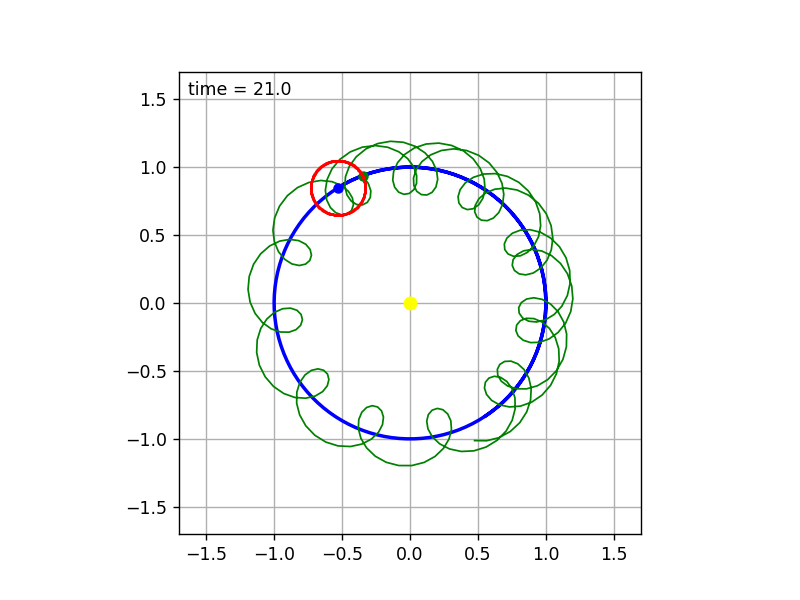

In [3]:
Ptolemee(w=12.3,W=1,r=0.2,R=1)